<a href="https://colab.research.google.com/github/LuizaGomes03/2TIAF---Software/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

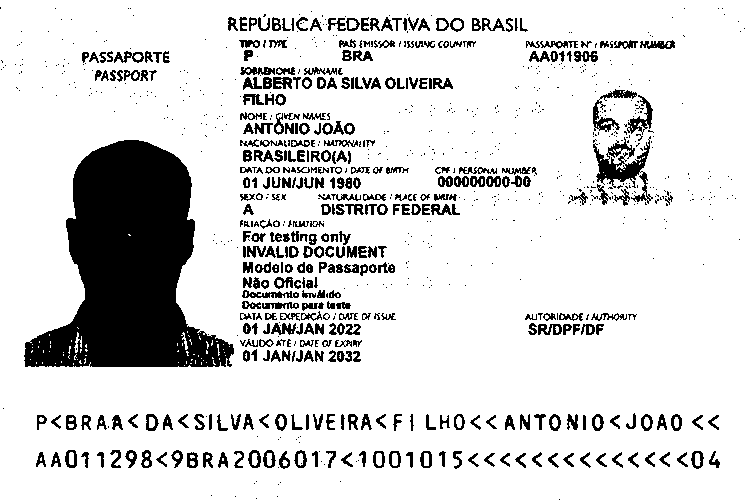

Nome: None
Sobrenome: None
Número do Passaporte: None
Nacionalidade: None
Data de Nascimento: None
Data de Validade: None
REPÚBLICA!FEDERATIVA DO BRASIL .
MSIE O emma Ns Cm rasante sorria
PASSAPORTE p BRA AADIAS06
. PASSPORT “ALBERTO DA SILVA OLIVEIRA .
FILHO . EM
Nom: que mas :
“1 ANTÔNIO JOAO ns
SNS oe E aa
BRASILEIROÇA) 7
Pp
1 JUNINUN 1980 TOODODBO DO” va :
A DISTRITO FEDERAL nt
ção: usem
oe testing onty
INVALID DOCUMENT
Modelo de Passaporte
Não Qficial
DES OA do
doar puta
SER De 4 su nsromende aero
4 JANHIAN 2022 SRIDPFIDE
vao ae ta
GA IANIJAN 2032
P<BRAA<LDA<SILVASOLIVEIRASF | LHO<X<ANTONIO<S JOAO <<
AAQ11298<9BRAZ006017<1001015<<<<<<<<<<<<<<04



In [2]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
import re
import json

# Para Windows, defina o caminho do executável do Tesseract
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# Em Colab e outros ambientes, o Tesseract geralmente já está instalado e no PATH.

def preprocess_image(image_path):
    # Carrega a imagem
    image = cv2.imread(image_path)

    # Converte a imagem para escala de cinza
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Binariza a imagem
    _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary

def extract_text_from_image(preprocessed_image):
    # Configurações do Tesseract para otimizar a leitura de documentos
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(preprocessed_image, config=custom_config, lang='por')
    return text

def process_extracted_text(text):
    # Expressões regulares para capturar informações específicas
    nome = re.search(r'Nome:\s*(.*)', text)
    sobrenome = re.search(r'Sobrenome:\s*(.*)', text)
    numero_passaporte = re.search(r'Número do Passaporte:\s*(\w+)', text)
    nacionalidade = re.search(r'Nacionalidade:\s*(\w+)', text)
    data_nascimento = re.search(r'Data de Nascimento:\s*(\d{2}/\d{2}/\d{4})', text)
    data_validade = re.search(r'Data de Validade:\s*(\d{2}/\d{2}/\d{4})', text)

    extracted_data = {
        'Nome': nome.group(1) if nome else None,
        'Sobrenome': sobrenome.group(1) if sobrenome else None,
        'Número do Passaporte': numero_passaporte.group(1) if numero_passaporte else None,
        'Nacionalidade': nacionalidade.group(1) if nacionalidade else None,
        'Data de Nascimento': data_nascimento.group(1) if data_nascimento else None,
        'Data de Validade': data_validade.group(1) if data_validade else None,
    }

    return extracted_data

def output_extracted_data(data):
    # Exibe os dados no console
    for key, value in data.items():
        print(f'{key}: {value}')

    # Salva os dados em um arquivo JSON
    with open('extracted_data.json', 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

# Caminho para a imagem do passaporte
image_path = '/content/passaport.jpg'

# Processa a imagem e extrai o texto
preprocessed_image = preprocess_image(image_path)

# Exibe a imagem pré-processada
cv2_imshow(preprocessed_image)

# Extrai o texto da imagem pré-processada
text = extract_text_from_image(preprocessed_image)

# Processa o texto extraído para obter os dados específicos
extracted_data = process_extracted_text(text)

# Exibe e salva os dados extraídos
output_extracted_data(extracted_data)
# Extrai o texto da imagem pré-processada
text = extract_text_from_image(preprocessed_image)

# Imprime o texto extraído
print(text)

In [1]:
!pip install pytesseract
!pip install opencv-python
!pip install opencv-python-headless
!sudo apt-get update
!sudo apt-get install -y tesseract-ocr
!sudo apt-get install -y tesseract-ocr-por

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [830 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,115 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,372 kB]
Get:13